In [13]:
!pip install pandas-datareader 
import pandas as pd
import pandas_datareader
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format


start = datetime.datetime(2018,1,1)
end = datetime.datetime(2022,1,1)

In [6]:
Tesla = web.DataReader('TSLA','yahoo',start,end)
Tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,21.47,20.73,20.80,21.37,"65,283,000.00",21.37
2018-01-03,21.68,21.04,21.40,21.15,"67,822,500.00",21.15
2018-01-04,21.24,20.38,20.86,20.97,"149,194,500.00",20.97
2018-01-05,21.15,20.80,21.11,21.11,"68,868,000.00",21.11
2018-01-08,22.47,21.03,21.07,22.43,"147,891,000.00",22.43


In [7]:
BMW = web.DataReader('BMWYY','yahoo',start,end)
BMW.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,34.76,34.27,34.27,34.76,"25,600.00",27.24
2018-01-03,35.04,34.81,34.99,34.95,"35,200.00",27.39
2018-01-04,35.43,35.17,35.43,35.19,"38,400.00",27.58
2018-01-05,35.62,35.38,35.56,35.60,"38,300.00",27.90
2018-01-08,36.03,35.76,35.97,35.84,"65,600.00",28.09


<function matplotlib.pyplot.show(close=None, block=None)>

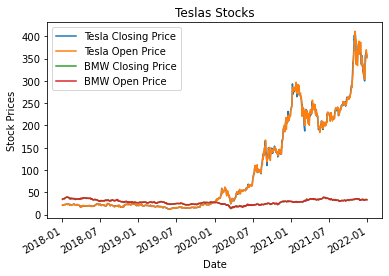

In [14]:
Tesla['Close'].plot(label='Tesla Closing Price', fig=(50, 5))
Tesla['Open'].plot(label='Tesla Open Price', fig=(50, 5))
BMW['Close'].plot(label='BMW Closing Price', fig=(50, 5))
BMW['Open'].plot(label='BMW Open Price', fig=(50, 5))
plt.legend()
plt.title('Teslas Stocks')
plt.ylabel('Stock Prices')
plt.show


# Tesla and BMW's opening price are pretty similar for the past 4 years
# Looking closely, from mid 2020, Tesla has been dominating over BMW with higher opening price
# We would have to look at volume (number of stocks traded) of the 2 stocks to compare in depth

<function matplotlib.pyplot.show(close=None, block=None)>

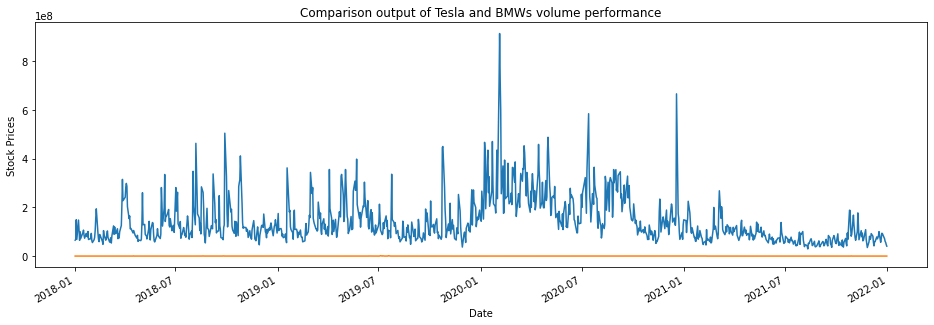

In [15]:
Tesla['Volume'].plot(label = 'Tesla Volume', figsize=(16, 5))
BMW['Volume'].plot(label = 'BMW Volume', figsize=(16, 5))
plt.title('Comparison output of Tesla and BMWs volume performance')
plt.ylabel('Stock Prices')
plt.show

# It seems as if I should be better off investing Tesla because it had a huge spike reaching a high volume trade somewhere in late 2018, early 2020, and early 2021

In [17]:
# If I were to invest on Tesla and am risk averse, I want to know its highest traded volume and to make sure that I can also jump on the investing trend
highest = Tesla['Volume'].max()
Tesla.loc[Tesla['Volume']==highest]
# It would be optimal to invest around the early 2020

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-04,64.60,55.59,58.86,59.14,"914,082,000.00",59.14


In [21]:
# I want to seek Tesla's top 3 highest stock price to see when I should sell my tesla share and get a good ROI 
Tesla3high = Tesla.nlargest(3, ['High'])
Tesla3high

,High,Low,Open,Close,Volume,Adj Close,returns,cumulative return
Date,,,,,,,,
2021-11-04,414.50,405.67,411.47,409.97,"76,192,200.00",409.97,0.01,19.19
2021-11-05,413.29,402.67,409.33,407.36,"64,886,400.00",407.36,-0.01,19.06
2021-11-03,405.13,384.21,392.44,404.62,"103,885,500.00",404.62,0.04,18.94


In [22]:
# I want to seek Tesla's top 3 lowest stock price to see when I can purchase some Tesla shares and hope to make a good ROI in the future
Tesla3low = Tesla.nlargest(3, ['Low'])
Tesla3low


,High,Low,Open,Close,Volume,Adj Close,returns,cumulative return
Date,,,,,,,,
2021-11-04,414.50,405.67,411.47,409.97,"76,192,200.00",409.97,0.01,19.19
2021-11-05,413.29,402.67,409.33,407.36,"64,886,400.00",407.36,-0.01,19.06
2021-11-03,405.13,384.21,392.44,404.62,"103,885,500.00",404.62,0.04,18.94


In [18]:
# I also want to know the cumulative returns of each stocks to compare and chose the one that gives a bigger cumulative return
BMW['returns'] = (BMW['Close']/BMW['Close'].shift(1))-1
Tesla['returns'] = (Tesla['Close']/Tesla['Close'].shift(1))-1

BMW['cumulative return'] = (1 + BMW['returns']).cumprod()
Tesla['cumulative return'] = (1 + Tesla['returns']).cumprod()

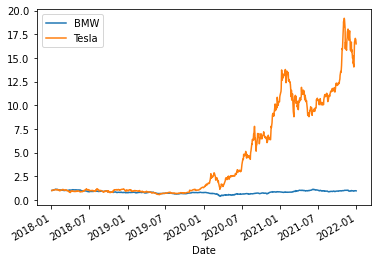

In [19]:
BMW['cumulative return'].plot(label='BMW')
Tesla['cumulative return'].plot(label='Tesla')
plt.legend()

# Tesla has a bigger cumulative return whereas BMW had a small cumulative return. Thus, I should invest in Tesla.

### writeup


The automobile industry is in high demand during the recent years, including innovative and environment friendly brands like Tesla and hugh luxury brands like BMW. In order to make a wise investing decision, an investor should compare two companies' stock performance: open, close, high, low, volume, and cumulative returns.

So, let's make a simple line plot that compares Tesla and BMW's open and close price. By glossing over the graph, Tesla and BMW's opening price are pretty similar for the past 4 years (2018-2022). Looking at it more closely, from mid 2020, Tesla has had higher opening price compared to BMW.

This isn't enough to make a investing decision.

So, le'ts compare volume (number of stocks traded) of the 2 stocks to compare in depth. We can see that I am better off investing in Tesla because of the huge spike somewhere in late 2018, early 2020, and early 2021. 

Let's add more meat into the analysis. If I am a risk averse investor and I want to confirm that I should invest in Tesla, I should check its highest traded volume. I would also appreciate looking at Tesla's top 3 highest stock price to see when I should sell my tesla share and get a good ROI. I also want to seek the top 3 lowest stock price to see when I can purchase some shares in a cheaper price.

I lastly want a confirmation that investing on a Tesla stock would give me a higher return. I used our pre-existing variables to calculate return and cumulative return. Then, compare the two companies' cumulative return by plotting another line chart to confirm that investing on a Tesla is good because it has a bigger cumulative return than BMW.